In [1]:
cd TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
from dataset import Dataset
from BB2tile import *
from greedy import *
from data import *
from experiment import *
import pandas as pd 

Populating the interactive namespace from numpy and matplotlib


In [3]:
# for object_id in [31,6,11,9,44,12]:#[2,7,35,22,18,12,31]:
#     print object_id
#     tiles, objIndicatorMat = createObjIndicatorMatrix(object_id,sampleNworkers=40,PRINT=False)

In [298]:
def run_all_experiments(object_id):
    print "Working on obj:",object_id
    tiles, objIndicatorMat = createObjIndicatorMatrix(object_id,sampleNworkers=40,PRINT=False)
    Ta, La, ga, solutionLista = experiment_avg(objIndicatorMat)
    Tm, Lm, gm, solutionListm = experiment_median(objIndicatorMat)
    Tl, Ll, gl, solutionListl = experiment_local(1, objIndicatorMat)
    Te, Le, ge, solutionListe = experiment_exhaustive(1,  objIndicatorMat,step_size=1000)
    Le = np.array(Le)
    try: 
        Le = Le[Le!=np.inf]
        maxidx = argmax(Le)
        Le = Le[maxidx] #Maximum likelihood 
        Te = Te[maxidx]
    except(ValueError):
        print Le
        Le = np.inf
        Te =np.nan
    return (Ta,Tm,Tl,Te),(La,Lm,Ll,Le),\
            np.array([gmat2arr(ga),gmat2arr(gm),gmat2arr(gl),gmat2arr(ge)]),\
            [solutionLista,solutionListm,solutionListl,solutionListe]

In [299]:
def gmat2arr(g):
    return np.array(g.T)[0]

In [300]:
T,L,g,soln = run_all_experiments(2)

Working on obj: 2
Starting Average Experiment with T value 2458
--------------------------
Starting Median Experiment with T value 47
--------------------------
Starting Local Search with T values between 1 and 15748
--------------------------
Starting Exhaustive Search with T values between 1 and 15748


--------------------------


In [242]:
import string

In [301]:
object_lst = list(object_tbl.id)

In [302]:
gfile = open("gamma.txt",'w')
Tfile = open("Tarea.txt",'w')
Lfile = open("likelihood.txt",'w')
solnfile = open("solution.txt",'w')
for objid in object_lst[2:4]:
    T,L,g,soln = run_all_experiments(objid)
    gfile.write(g.__repr__()+'\n')
    Tfile.write(T.__repr__().replace('(','').replace(')','\n'))
    Lfile.write(L.__repr__().replace('(','').replace(')','\n'))
    solnfile.write(soln.__repr__()+'\n')
gfile.close()
Tfile.close()
Lfile.close()
solnfile.close()

Working on obj: 3
Starting Average Experiment with T value 3151
--------------------------
Starting Median Experiment with T value 3706
--------------------------
Starting Local Search with T values between 1 and 8954
--------------------------
Starting Exhaustive Search with T values between 1 and 8954


--------------------------
[]
Working on obj: 4
Starting Average Experiment with T value 1842
--------------------------
Starting Median Experiment with T value 3189
--------------------------
Starting Local Search with T values between 1 and 15099
--------------------------
Failure:Interrupted


KeyError: 'Interrupted'

In [295]:
# Tfile = open("Tarea.txt",'a')
# Lfile = open("likelihood.txt",'a')
# # gfile = open("gamma.txt",'a')
# Tfile.write(T.__repr__().replace('(','').replace(')','\n'))
# Lfile.write(L.__repr__().replace('(','').replace(')','\n'))
# # gfile.write(g+'\n')

In [266]:
# [np.array(g.T)[0] for g in ga]

Find ML region from exhaustive search 

In [ ]:
# Running Greedy search actually crashes the Jupyter Kernel 
# tile_dataset = Dataset(tiles,objIndicatorMat,100)
# solution = greedySearch(tile_dataset)
# solution.printSolution()

In [25]:
from shapely.ops import cascaded_union
def join_tiles(solutionList,tiles):
    return cascaded_union([Polygon(tiles[tidx-1]) for tidx in solutionList])

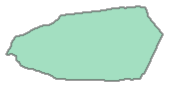

In [29]:
join_tiles(solutionLista,tiles)

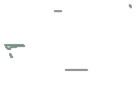

In [30]:
join_tiles(solutionListm,tiles)

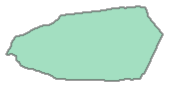

In [31]:
join_tiles(solutionListl,tiles)

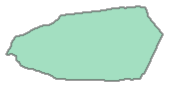

In [26]:
join_tiles(solutionListe,tiles)

# Plotting $\gamma$ probabilities for each tile

In [45]:
from matplotlib.colors import LogNorm
def plot_tile_gamma(objid,solutionList,tiles,gammas,PLOT=False):
    # Create a masked image for the object
    # where each of the worker BB is considered a mask and overlaid on top of each other 
    img_name = img_info[img_info.id==int(object_tbl[object_tbl.id==objid]["image_id"])]["filename"].iloc[0]
    fname = "../web-app/app/static/"+img_name+".png"
    
    width,height = get_size(fname)
    mega_mask = np.zeros((height,width))
    img_mask = Image.new('L', (width, height), 0)
    for tile_idx in range(len(tiles)):
        xlocs,ylocs = zip(*tiles[tile_idx])
        ImageDraw.Draw(img_mask).polygon(zip(ylocs,xlocs), outline=gammas[tile_idx], fill=gammas[tile_idx])
#         plt.figure()
#         plt.imshow(img_mask, cmap='PuBu_r', norm=LogNorm(vmin=1e-6, vmax=1))
#         plt.colorbar()
        #mask = np.array(img_mask)==1
        mega_mask+=np.array(img_mask)
    if PLOT: 
        # Visualize mega_mask
        plt.figure()
        plt.imshow(mega_mask+1e-8, cmap='PuBu_r', norm=LogNorm(vmin=1e-6, vmax=1))
#         img =mpimg.imread(fname)
#         plt.imshow(img,alpha=0.4)
        plt.colorbar()
    return mega_mask

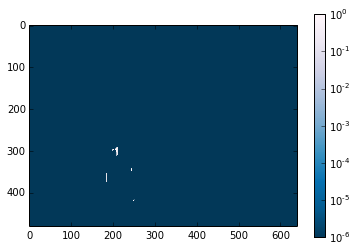

In [46]:
mask = plot_tile_gamma(2,solutionLista,tiles,ga,PLOT=True)

In [76]:
from matplotlib.colors import LogNorm
def plot_tile_gamma(objid,solutionList,tiles,gammas,PLOT=False):
    # Create a masked image for the object
    # where each of the worker BB is considered a mask and overlaid on top of each other 
    img_name = img_info[img_info.id==int(object_tbl[object_tbl.id==objid]["image_id"])]["filename"].iloc[0]
    fname = "../web-app/app/static/"+img_name+".png"
    
    width,height = get_size(fname)
    mega_mask = np.zeros((height,width))
    img_mask = Image.new('L', (width, height), 0)
    for tile_idx in range(len(tiles)):
        xlocs,ylocs = zip(*tiles[tile_idx])
        plt.scatter(xlocs,ylocs, c=np.ones_like(xlocs)*float(gammas[tile_idx]) , marker='.', zorder=1)
        
#        ImageDraw.Draw(img_mask).polygon(zip(ylocs,xlocs), outline=gammas[tile_idx], fill=gammas[tile_idx])
#         plt.figure()
#         plt.imshow(img_mask, cmap='PuBu_r', norm=LogNorm(vmin=1e-6, vmax=1))
#         plt.colorbar()
        #mask = np.array(img_mask)==1
#        mega_mask+=np.array(img_mask)
#     if PLOT: 
#         # Visualize mega_mask
#         plt.figure()
#         plt.imshow(mega_mask+1e-8, cmap='PuBu_r', norm=LogNorm(vmin=1e-6, vmax=1))
# #         img =mpimg.imread(fname)
# #         plt.imshow(img,alpha=0.4)
#         plt.colorbar()
#     return mega_mask

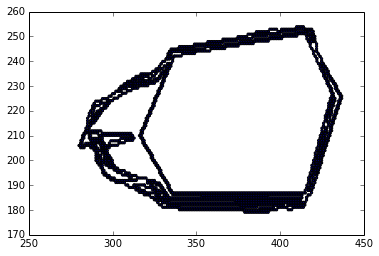

In [77]:
mask = plot_tile_gamma(2,solutionLista,tiles,ga,PLOT=True)

In [169]:
import shapely
import pickle as pkl 
tiles = pkl.load(open("polygons.pkl",'r'))
area_lst=[]
for tile in tiles:
    area_lst.append(shapely.geometry.Polygon(tile).area)
sorted_ascend_tile_by_size= list(np.array(tiles)[np.argsort(area_lst)[::-1]])

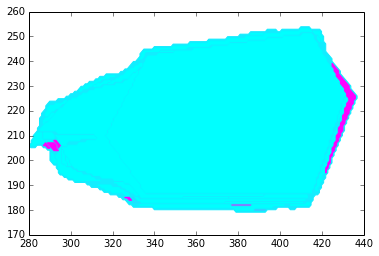

In [182]:
gammas=np.array(ga)[:,0]
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

fig,ax = plt.subplots(1)
patches = []
cmap = plt.get_cmap('cool')
colors = cmap(gammas)

for tile_idx in range(len(tiles)):
    polygon = Polygon(sorted_ascend_tile_by_size[tile_idx],closed=True,alpha=0.8,linewidth=1,edgecolor='black',fill=False,zorder=1)
    patches.append(polygon)

collection = PatchCollection(patches)
pcollection = ax.add_collection(collection)
collection.set_color(colors)

ax.autoscale_view()


In [307]:
np.savetxt?

In [183]:
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
# plt.colorbar(sm)